# Phase 4 Code Challenge Review



In [2]:
from src.student_caller import one_random_student
from src.student_list import quanggang 

%load_ext autoreload
%autoreload 2

TOC:

  - [Time Series](#ts)  

  - [Clustering](#clust)
    

<a id='ts'></a>

# Time Series

In [2]:
import pandas as pd
import numpy as np

In [3]:
ap = pd.read_csv('data/AirPassengers.csv')

<AxesSubplot:>

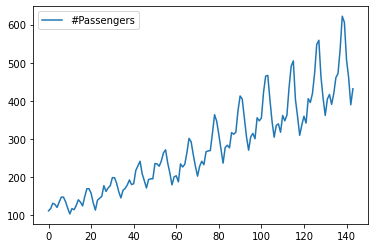

In [5]:
ap.plot()

not stationary, linear positive trend in mean. also a linear positive trend in variance. seasonality. 


With the data above, what is the first step in transforming it into data suitable for our time series models?

to_datetime, resample to bigger windows

What types of trends might we expect to find in our time series datasets?

In [10]:
# plot the time series

In [ ]:
one_random_student(quanggang)

What type of trends do you see in the above plot?

> Your answer here

In [ ]:
one_random_student(quanggang)

In [12]:
# Add to the plot to visualize trends by looking at summary statistics across a window of time.

In [ ]:
one_random_student(quanggang)

What are some ways to remove those trends? 

In [ ]:
first differencing, rolling mean, seasonal differencing

What is the goal of removing those trends?

remove the serial correlation data in your data

In [ ]:
one_random_student(quanggang)

How can we diagnose whether we have successfully removed the trends?

dickey fuller test

In [ ]:
one_random_student(quanggang)

Use the Augmented Dickey Fuller test to see if the detrended data is ready for modeling

In [130]:
# your code here

In [ ]:
one_random_student(quanggang)

How can ACF/PACF plots below help us pick our model coefficients?

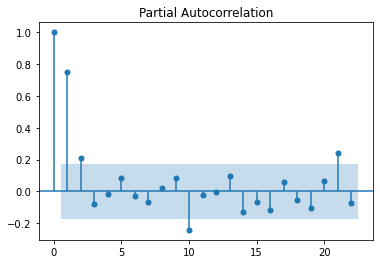

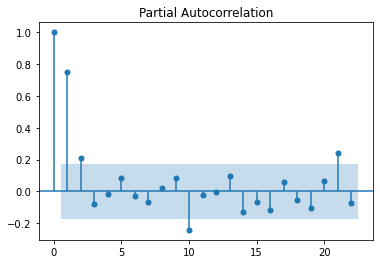

In [107]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ap.diff(12).dropna())

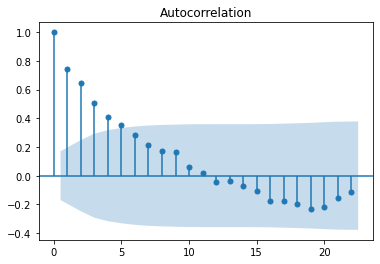

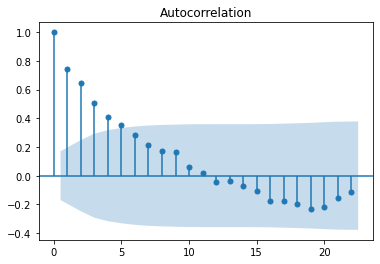

In [108]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ap.diff(12).dropna())


In [ ]:
one_random_student(quanggang)

Let's look at another dataset with a smaller time unit.

In [109]:
aq = pd.read_csv('data/AirQualityUCI.csv', delimiter=';')
aq.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [110]:
# Explain what this gnarly bit of code doing? 
aq['date_time'] = pd.to_datetime(aq['Date'] + ' ' + aq['Time'], format='%d/%m/%Y %H.%M.%S')
aq.set_index('date_time', inplace=True)

Which of the features are possible candidates for time series modeling?

> Your answer here

In [ ]:
one_random_student(quanggang)

<AxesSubplot:xlabel='date_time'>

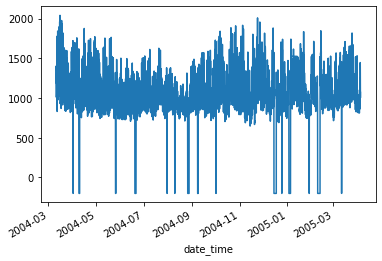

In [111]:
aq['PT08.S1(CO)'].plot()

What's going on here? Reference the [docs](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

In [ ]:
one_random_student(quanggang)

In [122]:

aq_replaced = np.where(aq['PT08.S1(CO)'] ==-200, np.nan, aq['PT08.S1(CO)'])
aq_replaced = pd.Series(aq_replaced, index=aq.index)

What techniques do we have to fill the nan's in our data?

In [ ]:
one_random_student(quanggang)

Use one of the techniques mentioned above to fill the data.

In [ ]:
# Your code here

In [ ]:
one_random_student(quanggang)

Let's look at the daily levels of PT08.S1(CO)

In [ ]:
# Your code here

In [ ]:
one_random_student(quanggang)

Plot the pacf and acf's for the resampled data.  Use it to identify the AR/MA components.

In [ ]:
# Your code here

In [ ]:
one_random_student(quanggang)

<a id='pca'></a>

<a id='clust'></a>

# Clustering

Question: What is the difference between supervised and unsupervised learning?

Supervised learning has labels (feature and target). Unsupervised learning does not. 

Describe how the KMeans algorithm works.

Be sure to mention initialization and how it updates.


Randomly assign K initial centroids
Each observation assigned to the cluster to which it is the closest
Cluster centroids are computed
Observations are reassigned to one of the clusters, process is repeated until there is no opportunity for reallocation (centroids stop moving)

How does KMeans know how many clusters to make?

You tell it when you instantiate it. 

How does KMeans assess the best clusters?  Look at the doc-string if you need to.

Grid search, elbow method on silhouette score. Stop at point of diminishing returns on silhouette score.  

In [1]:
from sklearn.cluster import KMeans

KMeans()

KMeans()

## Agglomerative Clustering

In [134]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering()


Describe how Heirarchical Agglomerative Clustering works.

Be sure to mention how it inititializes, and how clusters are formed.

form many small clusters (n=2) and build up until clusters are optimised to your requirements.

What are linkages? Explain how the default linakage works in the model. 

> Your answer here

In [ ]:
one_random_student(quanggang)

How does heirarchical aglomerative clustering decide how many clusters to make?

Grid search, elbow method on silhouette score. Stop at point of diminishing returns on silhouette score.  

Visualize on a dendrogram, and you may be able to assess visually. 

What metrics do we have to score the clusters which are formed?

> Your answer here

In [ ]:
one_random_student(quanggang)

Describe the difference between them.

> Your answer here

In [ ]:
one_random_student(quanggang)

Let's code together. For the iris dataset loaded below, implement a heirarchical agglomerative clusterer with the appropriate fitting technique with a simple train-test-split.

Choose the appropriate ammount of clusters based on an appropriate metric. 

Bonus: Use PCA to visualize in two dimensions the cluster groups of the best metric.

In [136]:
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])
y = data['target']